In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from cf_tree import CFTree 
from clustering_feature import ClusteringFeature
from geo.point import Point


n_samples = 1500
random_state = 2

X, y= make_blobs(n_samples=n_samples,
                centers=5,
                cluster_std=[1.0, 3, 0.3, 2, 5],
                random_state=random_state)

cluster = KMeans(n_clusters=5, random_state=random_state).fit(X)
y_pred=cluster.predict(X)

In [33]:
def bico(coreset_size):

    tree=CFTree(dim=2,thresh=0.001,max_nodes= coreset_size)

    for row in X:
        tree.insert(Point(row))

    coreset=tree.get_coreset()


    coreset_centers=np.vstack([c.center.p for c in coreset])
    ws=[c.weight for c in coreset]

    plt.subplot(131)
    plt.scatter(coreset_centers[:,0],coreset_centers[:,1],s=ws)
    plt.title("Reduced data set of size {0}".format(coreset_size))
    
  
    X_core=np.vstack([c.center.p for c in coreset])
    cluster_w=KMeans(n_clusters=5, random_state=random_state).fit(X_core,sample_weight=ws)
    centroids_w = cluster_w.cluster_centers_
    y_pred_w = cluster_w.predict(X)
    
    plt.subplot(132)
    plt.scatter(centroids_w[:, 0], centroids_w[:, 1],
            marker='o', s=50, linewidths=2,
            color='r', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred_w)
    plt.title("Clustering on reduced data")
    
    centroids = cluster.cluster_centers_
    plt.subplot(133)
    plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='o', s=50, linewidths=2,
        color='r', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Clustering on original data set")
    plt.show()



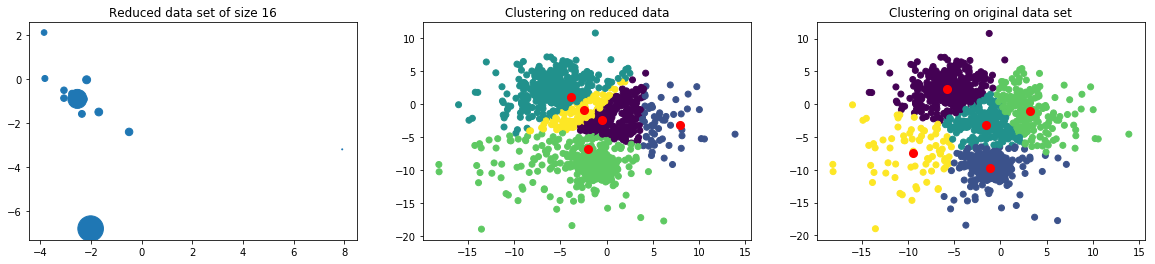

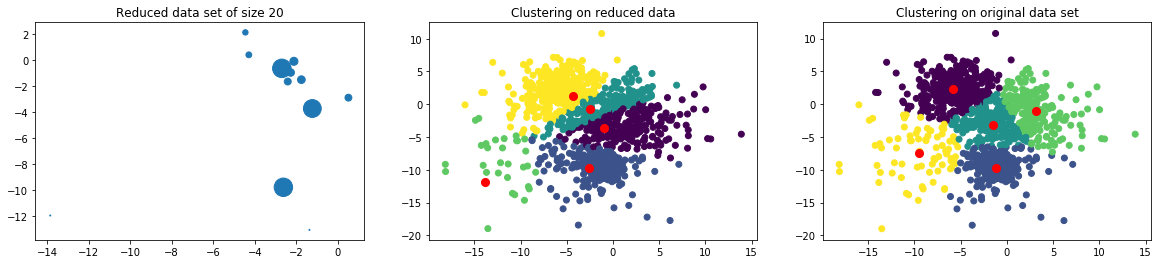

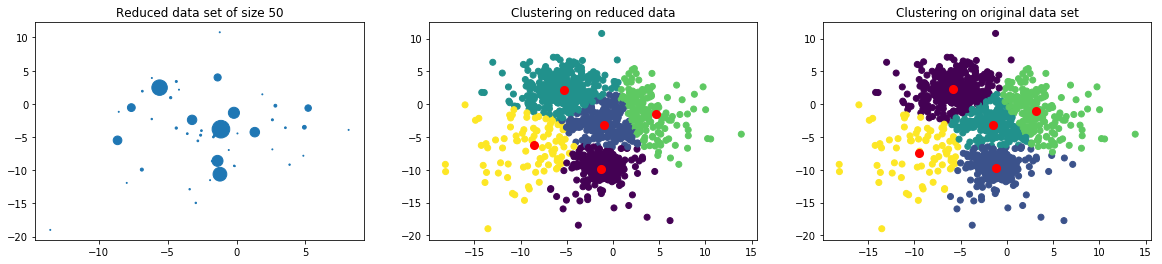

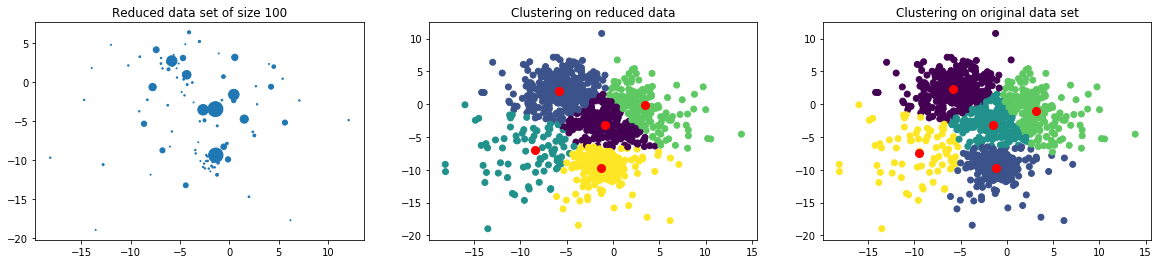

In [41]:
plt.rcParams["figure.figsize"] = [20,4]

for size in [16, 20, 50, 100]:
    bico(size)